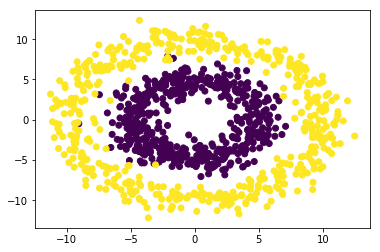

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
D = 2

R_inner = 5
R_outer = 10

# Uniformly distributed variable
#    for half the data that depends on the inner radius
# Spread around 5
R1 = np.random.randn(N//2) + R_inner

# Generate angles
# Polar coordinates that are uniformly distribbuted
theta = 2 * np.pi * np.random.random(N//2)

# Convert the polar coords to x,y coords
X_inner = np.concatenate([[R1 * np.cos(theta), R1 * np.sin(theta)]]).T

# same with the outer radius
R2 = np.random.randn(N//2) + R_outer
theta = 2 * np.pi * np.random.random(N//2)
X_outer = np.concatenate([[R2 * np.cos(theta), R2 * np.sin(theta)]]).T

X = np.concatenate([X_inner, X_outer])

# Order here doesn't really matter
T = np.array([0] * (N//2) + [1] * (N//2))

plt.scatter(X[:, 0], X[:, 1], c=T)
plt.show()


In [8]:
# Logistic regression may not be good for this because
#    a straight line pass through this?

# Wait a minute and check this out:
ones = np.array([[1] * N]).T

# The trick: Creating yet another column that represents
#    the radius of the points
r = np.zeros((N,1))
for i in range(N):
    r[i] = np.sqrt(X[i,:].dot(X[i,:]))
    
    
Xb = np.concatenate((ones, r, X), axis=1)

w = np.random.rand(D + 2)

z = Xb.dot(w)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy2(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

Y = sigmoid(z)

learning_rate = 0.0001
error = []
epochs = 5000
for i in range(epochs):
    e = cross_entropy2(T, Y)
    error.append(e)
    if i % 100 == 0:
        print(e)
    
    w += learning_rate * (np.dot((T - Y).T, Xb) - 0.01 * w)
    
    Y = sigmoid(Xb.dot(w))

cr = 1 - np.abs(T - np.round(Y)).sum() / N
print("Final w:", w, "epochs =", epochs, "Classification rate", cr)

2300.40918913
543.694768658
416.984624613
337.741974412
284.965915145
247.737534977
220.210973412
199.076877201
182.352865281
168.789973335
157.566380546
148.12091298
140.0580507
133.091340687
127.008380369
121.648411209
116.887551596
112.628806767
108.795151554
105.324640304
102.166884851
99.2804748101
96.6310590674
94.1898991069
91.9327642358
89.8390780723
87.8912520832
86.074160037
84.3747197899
82.7815576642
81.2847369862
79.8755369055
78.5462709454
77.2901371931
76.1010938648
74.9737553649
73.9033049985
72.8854213024
71.9162155729
70.9921786512
70.1101354012
69.2672056103
68.4607702779
67.6884424431
66.9480418526
66.2375728899
65.555205286
64.8992572085
64.2681803945
63.6605470432
Final w: [ -1.16941526e+01   1.58275579e+00   9.44590854e-04   8.59995344e-03] epochs = 5000 Classification rate 0.993


Observations:
- Pretty good classification rate
- x, y weights nearly 0... classification doesn't really depend on the x and y coords
- **But it depends on the bias... if we put in a small radius, we automatically have this negative bias, and that pushes the classifcation towards 0, and if it is a big radius, it pushes the classification towards 1.**

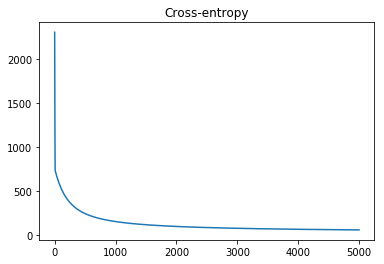

In [9]:
plt.plot(error)
plt.title('Cross-entropy')
plt.show()